<a href="https://colab.research.google.com/github/Nakulpradeep94/-ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ALMABETTER/Zomato_Restaurant_clustering_and_sentiment_analysis/Zomato Restaurant names and Metadata.csv')
review_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ALMABETTER/Zomato_Restaurant_clustering_and_sentiment_analysis/Zomato Restaurant reviews.csv')

In [18]:
df1.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [19]:
df1.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [20]:
df1.shape

(105, 6)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


Note that even the cost feature is an object

In [22]:
df1.describe().T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [23]:
#converting cost column to integer type
df1['Cost']=df1['Cost'].str.replace(",","").astype(int)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


Initially we will only be doing the data checks on the first dataset as clustering is only needed to be done on that dataset alone.So merging will be done later

# **Handling Null Values**

In [25]:
df1.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

so there are 54 null values in collection and 1 null value in timings


In [27]:
# Filling all missing values  in collection
df1['Collections'].fillna('Not Rated',inplace=True)

we have successfully removed all null values in collection column.Now only timing column is left which we can drop as a feature

In [26]:
#checking for duplicate values in the first dataset
df1.duplicated().sum()

0

**Removing unecessary columns**

In [30]:
df1.drop(['Links','Timings'],axis=1,inplace=True)

In [31]:
df1.head()

,Name,Cost,Collections,Cuisines
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I..."
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese"
2,Flechazo,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med..."


Now checking for null values after droping  timing feature

In [32]:
df1.isnull().sum()

Name           0
Cost           0
Collections    0
Cuisines       0
dtype: int64

so there is no more null values

# **Exploratory data Analysis**

Top 10 expensive restaurants

Text(0.5, 1.0, 'Top 10 expensive restaurants')

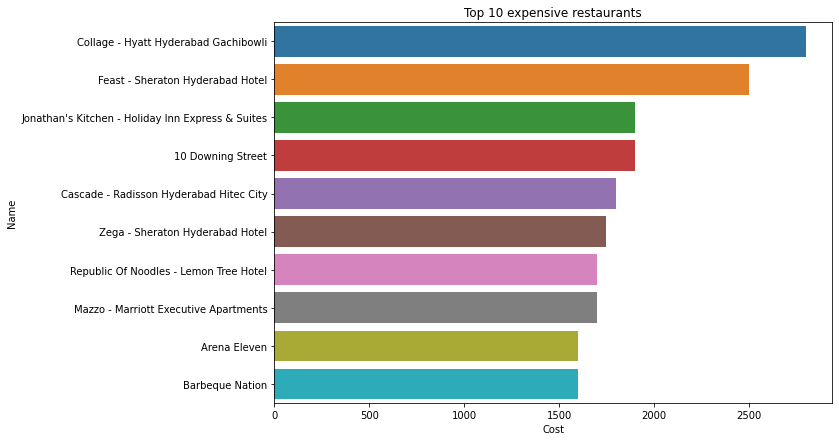

In [42]:
plt.rcParams['figure.figsize']= (10,7)
sns.barplot(x='Cost',y='Name',data=df1.sort_values(by='Cost',ascending=False)[:10])
plt.title("Top 10 expensive restaurants")


Top 10 cheapest restaurants

Text(0.5, 1.0, 'Top 10 cheapest restaurants')

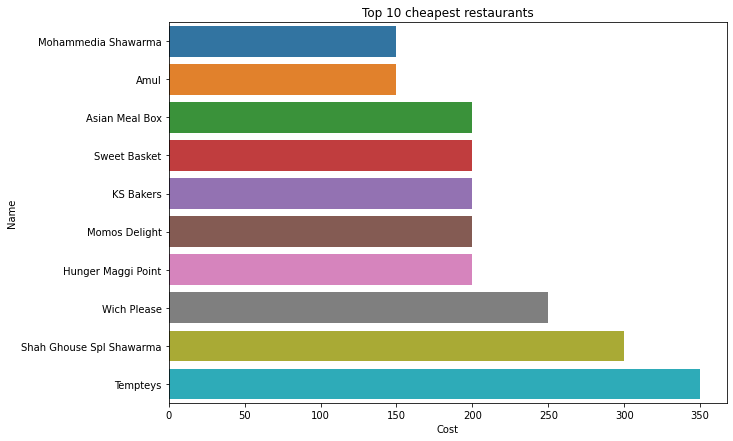

In [43]:
plt.rcParams['figure.figsize']= (10,7)
sns.barplot(x='Cost',y='Name',data=df1.sort_values(by='Cost',ascending=True)[:10])
plt.title("Top 10 cheapest restaurants")

In [62]:
cuisine=df1['Cuisines'].str.split(', ''')

In [65]:
#To extract all cuisines from each of the rows
cuisine_list=[]
for elem in cuisine:
  for subelem in elem:
   cuisine_list.append(subelem)
cuisine_series = pd.Series(cuisine_list)

In [74]:
# Creating DataFrame of Cuisines and their Counts.
cuisine_df = cuisine_series.to_frame(name='Cuisines')
cuisine_df= cuisine_df.value_counts(ascending=False).reset_index()
cuisine_df.rename(columns={0:'Count'},inplace=True)
cuisine_df.head()

,Cuisines,Count
0,North Indian,61
1,Chinese,43
2,Continental,21
3,Biryani,16
4,Asian,15


Text(0.5, 1.0, 'Most popular cuisines')

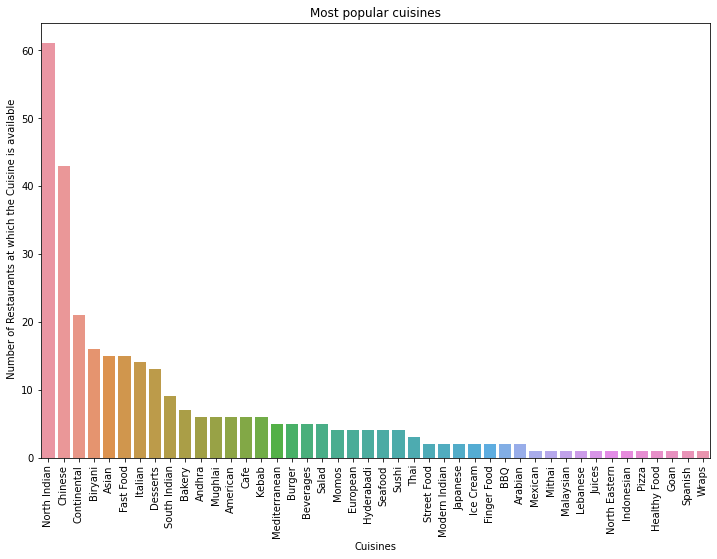

In [77]:
# plot of most served Cuisine in Restaurants
plt.rcParams['figure.figsize']= (12,8)
sns.barplot(data=cuisine_df, x='Cuisines', y= 'Count')
plt.xlabel('Cuisines')
plt.xticks(rotation=90)
plt.ylabel(' Number of Restaurants at which the Cuisine is available')
plt.title('Most popular cuisines')